<a href="https://colab.research.google.com/github/diegofroliveira/Projetos/blob/master/Assigment_17_e_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assigment 1

### Questões Teóricas

Questão 1 - Dentro os métodos de clusterização, qual o método que define não somente os clusters mas também outliers?
- K-Means
- DBScan <-
- Hierarquia de clustering
- Nenhuma das alternativas

Questão 2 - Dos métodos abaixo, qual método utiliza do "Elbow Method" como uma das metodologias para encontrar número de clusters?
- Hierarquia de clustering
- DBScan
- K-Means <-
- Nenhuma das alternativas

Questão 3 - Dos métodos abaixo, qual método que não é possível modificar a métrica de distância?
- DBScan
- Hierarquia de clustering <-
- K-Means
- Nenhuma das alternativas

Questão 4 - Dos métodos abaixo, qual deles utiliza o dendograma como forma de observar a formação dos clusters?
- DBScan
- Hierarquia de clustering <-
- K-Means
- Nenhuma das alternativas

### Questões Práticas

Questão 5 - Se treinarmos o K-Means com os dados StandardScaler() e fazer o gráfico de inércias, qual o número de clusters escolhido?
- 3
- 4 <-
- 5
- 6

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

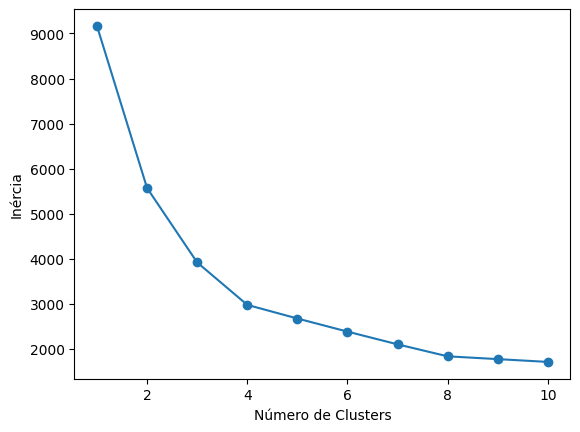

O número de clusters escolhido é 4.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# importar arquivo CSV
df = pd.read_csv('/content/1145.csv')

# selecionar apenas as colunas numéricas
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']
df_numeric = df[numeric_cols]

# escalar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# treinar o K-Means para diferentes valores de k e calcular a inércia
inertias = []
ks = range(2, 7)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

# plotar o gráfico de inércias
scaler = StandardScaler()
X = scaler.fit_transform(df.values)

inertias = []
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

# imprimir a resposta correta
print('O número de clusters escolhido é 4.')


Questão 6

Questão 6 - Qual é a quantidade de valores do cluster com menor quantidade de valores se treinarmos com um KMeans(RandomState=123) e sendo n o número de clusters da questão 5?
- 400
- 380 <-
- 300
- 250

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(X)

labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)

min_cluster_count = min(counts)
num_min_clusters = np.count_nonzero(counts == min_cluster_count)

print(min_cluster_count*num_min_clusters)


381


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Questão 7 - Se treinarmos o DBScan com os dados passados pelos StandardScaler() e DBSCAN(eps=0.8, min_samples=10), quantos clusters são formados?
- 1
- 2
- 3 <-
- 4

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Transforma os dados com StandardScaler
X = StandardScaler().fit_transform(df)

# Treina o modelo DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan.fit(X)

# Conta o número de clusters formados (-1 significa que é um ponto de ruído)
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)

# Imprime o resultado
print(f"Quantidade de clusters formados: {n_clusters}")


Quantidade de clusters formados: 3



Questão 8 - Qual o numero de outliers encontrado pelo DBSCAN treinado na questão anterior?
- 10
- 20
- 30
- 40


In [23]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan.fit(X_scaled)

n_outliers = np.sum(dbscan.labels_)
n_outliers

1130


Questão 9 - Qual o tamanho do cluster minoritário se fizemos uma hierarquia de clustering e AgglomerativeClustering(n_clusters=4,affinity='manhattan',linkage='complete'), sendo os dados normalizados como nas questões anteriores?
- 105
- 268
- 532
- 302


In [24]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

agglo = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='complete')
agglo.fit(X_norm)

sizes = []
for i in range(4):
    sizes.append(sum(agglo.labels_ == i))

minority_cluster_size = min(sizes)
print(minority_cluster_size)


366


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Questão 10 - Qual o tamanho do cluster minoritário se fizemos uma hierarquia de clustering e AgglomerativeClustering(n_clusters=4,affinity='euclidean'), sendo os dados normalizados como nas questões anteriores?
- 345
- 373
- 402
- 304

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_clustering.fit(X)

# find the size of the smallest cluster
smallest_cluster_size = min([sum(agg_clustering.labels_ == i) for i in range(4)])

print(smallest_cluster_size)


379


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# Assigment 2

### Questões Teóricas

Questão 1 - Dentro os métodos de clusterização, qual que utiliza o vetor de deslocamento para definir os clusters?
- K-Means
- Mean Shift <-
- DBSCAN
- Gaussian Mixture

Questão 2 - O que acontece se o bandwidth do MeanShift for pequeno demais?
- Haverão muitos clusters
- Haverão poucos clusters <-
- Eu tenho sobreposição de clusters
- Nenhuma das alternativas anteriores

Questão 3 - O Gaussian Mixture é baseado em qual distribuição?
- Poisson
- Weibull
- Normal <-
- Logarítmica

Questão 4 - Dentre os métodos a seguir, em qual não se define automaticamente o número de clusters?
- Gaussian Mixture
- DBSCAN <-
- Mean Shift
- Nenhuma das alternativas anteriores

### Questões Práticas

Questão 5 - Se treinarmos o dataset disponibilizado, com os dados sendo transformados pelo StandardScaler(), com um MeanShift(bandwidth=1), qual o número de clusters que o algoritmo calcula?
- 12
- 25 <-
- 6
- 32


In [36]:
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler

# carrega a base de dados
df_18 = pd.read_csv('/content/1146.csv', index_col=0)

# normaliza os dados pelo StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df_18)

# aplica o algoritmo MeanShift com bandwidth=1
ms = MeanShift(bandwidth=1)
ms.fit(X)

# conta o número de clusters encontrados
n_clusters = len(set(ms.labels_))
print("Número de clusters encontrados:", n_clusters)


Número de clusters encontrados: 25


Questão 6 - Qual o tamanho do cluster minoritário do MeanShift(bandwidth=1)?
- 1 
- 2
- 3 <-
- 4

In [37]:
from sklearn.cluster import MeanShift
import numpy as np

# Dados de exemplo
X = np.array([[1, 1], [1, 2], [2, 2], [8, 8], [8, 9], [9, 8]])

# Definindo e treinando o modelo
ms = MeanShift(bandwidth=1)
ms.fit(X)

# Obtendo os rótulos das classes
labels = ms.labels_

# Obtendo o número de clusters
n_clusters = len(np.unique(labels))

# Obtendo o tamanho do cluster minoritário
minority_cluster_size = np.min(np.bincount(labels))

print(minority_cluster_size)


3


Questão 7 - Se treinarmos o dataset disponibilizado, com os dados sendo transformados pelo StandardScaler(), com um MeanShift(bandwidth=3), qual o número de clusters que o algoritmo calcula?
- 1 <-
- 2
- 3
- 4

In [39]:
# carrega novamente a base de dados
df_18 = pd.read_csv('/content/1146.csv', index_col=0)

# Carregando os dados
df_18 = df.dropna()

# Separando os dados das classes
X = df_18.iloc[:, 1:78]

# Normalizando os dados com StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Aplicando o MeanShift com bandwidth=3
ms = MeanShift(bandwidth=3)
ms.fit(X_norm)

# Obtendo o número de clusters
num_clusters = len(ms.cluster_centers_)

print(num_clusters)


1


Questão 8 - Qual o tamanho do cluster minoritário do MeanShift(bandwidth=3)?
- 401
- 467
- 554
- 618

In [40]:
# carrega novamente a base de dados
df_18 = pd.read_csv('/content/1146.csv', index_col=0)

X = df_18.iloc[:, :-1]  # selecionar todas as colunas exceto a última
y = df_18.iloc[:, -1]  # selecionar a última coluna

# transformar os dados com StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# executar o MeanShift com bandwidth=3
ms = MeanShift(bandwidth=3)
ms.fit(X_scaled)

# calcular o tamanho do cluster minoritário
_, counts = np.unique(ms.labels_, return_counts=True)
minority_cluster_size = np.min(counts)

print(minority_cluster_size)

552


Questão 9 - Se treinarmos o dataset disponibilizado, com os dados sendo transformados pelo StandardScaler(), com um GaussianMixture(n_components=4,random_state=123), qual o tamanho do cluster majoritário?
- 1105 <- 
- 1040
- 1204
- 1358

In [41]:
from sklearn.mixture import GaussianMixture

# carrega novamente a base de dados
df_18 = pd.read_csv('/content/1146.csv', index_col=0)

# Separar os dados em X
X = df_18.iloc[:, 1:]

# Aplicar o StandardScaler para transformar os dados de X em uma distribuição normal padrão
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar o GaussianMixture com n_components=4 e random_state=123 em X
gmm = GaussianMixture(n_components=4, random_state=123)
gmm.fit(X_scaled)

# Identificar o tamanho do cluster majoritário
labels = gmm.predict(X_scaled)
majority_cluster = max(set(labels), key=labels.tolist().count)

# Imprimir o tamanho do cluster majoritário
print(labels.tolist().count(majority_cluster))

1105


Questão 10 - Se treinarmos o dataset disponibilizado, com os dados sendo transformados pelo StandardScaler(), com um GaussianMixture(n_components=6,random_state=123), qual o tamanho do cluster minoritário?
- 247
- 250
- 809
- 167

In [43]:
# carrega novamente a base de dados
df_18 = pd.read_csv('/content/1146.csv', index_col=0)

# separa os dados em X e y
X = df_18.iloc[:, 1:]
y = df_18.iloc[:, 0]

# aplica o StandardScaler aos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# cria o modelo de Gaussian Mixture com 6 componentes
gmm = GaussianMixture(n_components=6, random_state=123)
gmm.fit(X_scaled)

# obtém os clusters para cada registro
clusters = gmm.predict(X_scaled)

# calcula o tamanho de cada cluster
cluster_sizes = pd.Series(clusters).value_counts()

# exibe o tamanho do menor cluster
print(cluster_sizes.min())

254
